In [376]:
import warnings
warnings.filterwarnings('ignore')

In [377]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [378]:
# Data exploration
data = pd.read_csv('./data/boston.csv')
data.columns = [s.upper() for s in data.columns]
discrete_covariate = ['CHAS', 'RAD']

In [379]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


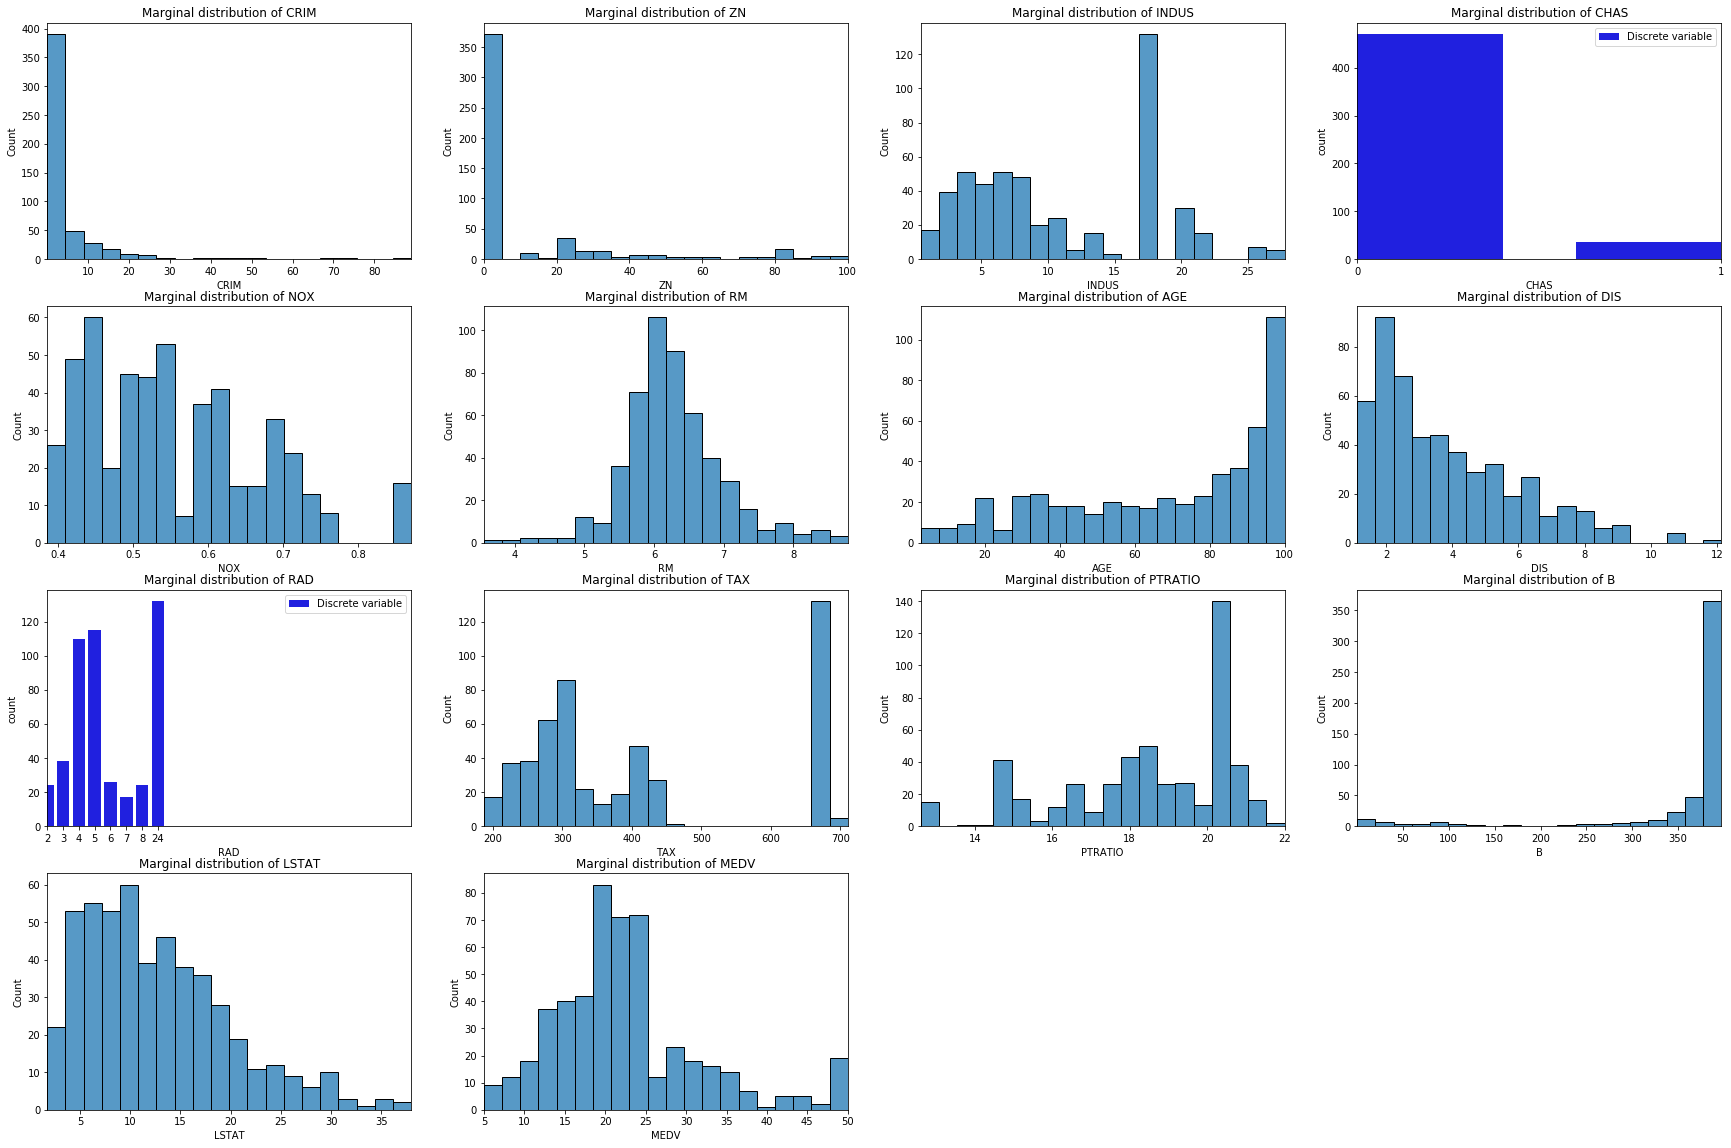

In [380]:
bins = 20
plt.figure(figsize=(30,20))
for i, cov in enumerate(data.columns, 1):
    plt.subplot(4, 4, i)
    if cov in discrete_covariate :
        sns.countplot(data[cov], color = 'b')
        plt.legend(['Discrete variable'])
    else :
        sns.histplot(data[cov], bins=bins, discrete = False)
    plt.title("Marginal distribution of " + cov)
    plt.xlim(data[cov].min(), data[cov].max())
    
plt.show()

In [381]:
data_missing = pd.read_csv('./data/data_nan.csv', index_col = 0)

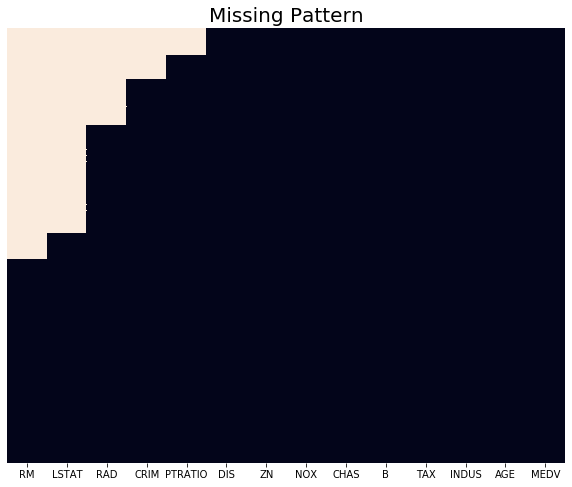

In [382]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_missing.isnull(), cbar = False)
plt.yticks([])
plt.ylabel("")
plt.title("Missing Pattern", fontsize = 20)
plt.show()

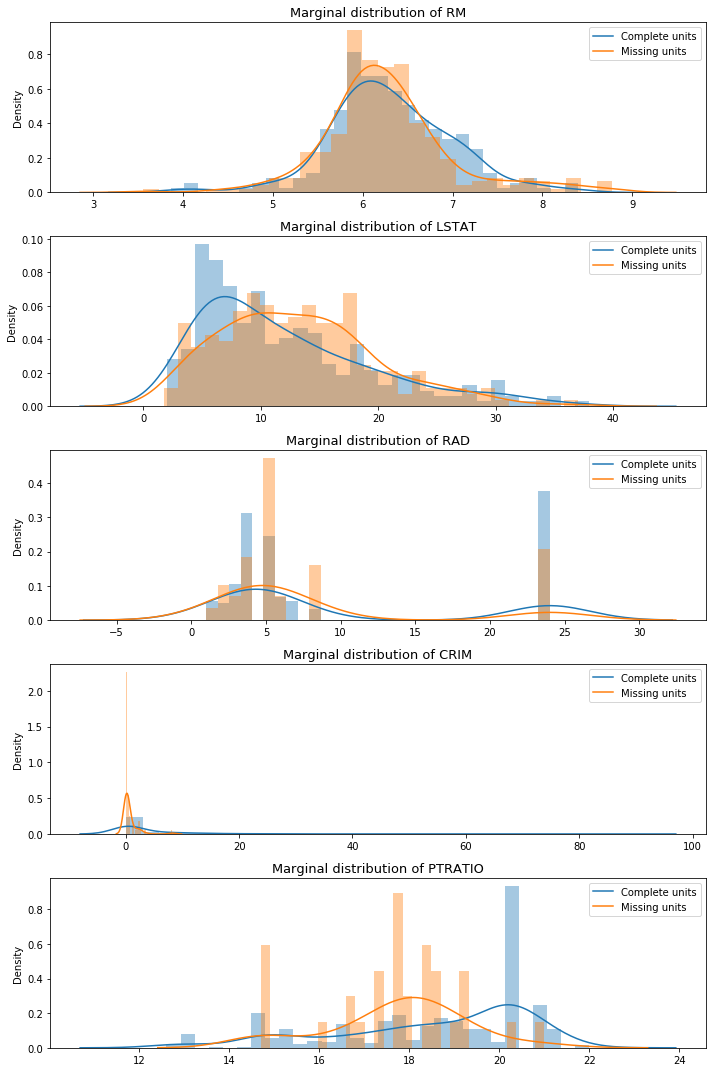

In [383]:
bins = 30
missing_cov = ['RM', 'LSTAT', 'RAD', 'CRIM', 'PTRATIO']
complete_data = data[data_missing.isnull()]
fig, ax = plt.subplots(5, figsize=(10,15))

for i, cov in enumerate(missing_cov):
    sns.distplot(data_missing[cov], bins=bins, hist=True, ax= ax[i])
    sns.distplot(complete_data[cov], bins=bins, hist=True, ax= ax[i])
    ax[i].legend(['Complete units', 'Missing units'], loc="upper right", fontsize=10)
    ax[i].set_xlabel('')
    ax[i].set_title("Marginal distribution of "+ cov, fontsize=13)

fig.tight_layout()
plt.show()